In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

import sys

sys.path.append('../../helper_classes')
from limit_utils import get_sensitivity_bands

/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/Robert/anaconda3/envs/flamedisx/lib/python3.11/site-packages/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [2]:
def get_signal_rates_from_likelihood(likelihood_file):
    sys.path.append('..')
    likelihood_class = __import__('create_simple_template_likelihood', globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [3]:
def scaling_fn(mu, mu_ref):
    return mu / mu_ref * 1e-45

In [4]:
signal_expected_mean = get_signal_rates_from_likelihood('../wimp_sensitivity/likelihoods/SI_40t_140ty.pkl')

In [5]:
masses, bands = get_sensitivity_bands(directory='../wimp_sensitivity/outputs/SI_40t_140ty',
                                      scaling_fn=scaling_fn,
                                      signal_name='WIMP',
                                      signal_expected_mean=signal_expected_mean,
                                      inference_config='../wimp_sensitivity/inference_configs/SI_WIMP.ini')

Found 144 failed toy for WIMP9; removing...
Found 15 failed toy for WIMP11; removing...
Found 3 failed toy for WIMP16; removing...
Found 2 failed toy for WIMP19; removing...
Found 6 failed toy for WIMP32; removing...
Found 8 failed toy for WIMP36; removing...
Found 10 failed toy for WIMP40; removing...
Found 18 failed toy for WIMP46; removing...
Found 25 failed toy for WIMP65; removing...
Found 39 failed toy for WIMP91; removing...
Found 44 failed toy for WIMP129; removing...
Found 48 failed toy for WIMP182; removing...
Found 49 failed toy for WIMP361; removing...
Found 51 failed toy for WIMP508; removing...
Found 46 failed toy for WIMP5000; removing...
Found 58 failed toy for WIMP10000; removing...


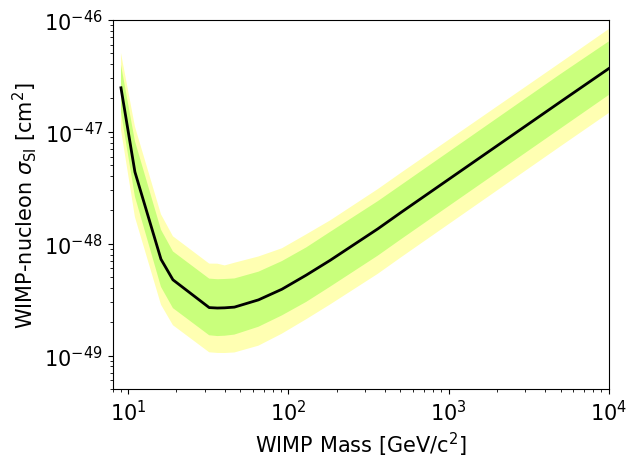

In [6]:
fig = plt.figure()
ax = fig.gca()

plt.plot(masses, bands[0], color='black', lw=2.)
plt.fill_between(masses, bands[-1], bands[1], facecolor='#00ff00', lw=0, alpha=0.3)
plt.fill_between(masses, bands[-2], bands[2], facecolor='#ffff00', lw=0, alpha=0.3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xlab = r'WIMP Mass [GeV/c$^2$]'
xlim = (8, 10000)

ylab = r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]'
ylim = (5e-50, 1e-46)

ax.set_xlabel(xlab, fontsize=15)
ax.set_xlim(xlim)

ax.set_ylabel(ylab, fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')
ax.set_xscale('log')